## Train ver3.0

@Juran 2021.11.29

- create_data_ver3.0로 생성된 데이터셋 이용
- 미디어파이프 랜드마크 8-5번, 8-0번, 7-0번 사이 거리 측정하여 데이터셋 생성

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1 -> click
# 0 -> none

### 데이터셋 로드

In [3]:
df_click = pd.read_csv('dataset/dataset_click_ver3.csv')
del df_click['Unnamed: 0']
df_click.head()

,0,1,2,3
0,0.290816,0.312532,0.324417,1
1,0.291533,0.303578,0.320783,1
2,0.290609,0.300012,0.317731,1
3,0.291715,0.301329,0.318600,1
4,0.291397,0.301152,0.318131,1


In [4]:
df_none = pd.read_csv('dataset/dataset_none_ver3.csv')
del df_none['Unnamed: 0']
df_none.head()

,0,1,2,3
0,0.168560,0.385461,0.377677,0
1,0.174939,0.420652,0.417135,0
2,0.174106,0.432268,0.430094,0
3,0.173394,0.430952,0.428801,0
4,0.172349,0.432382,0.429972,0


In [5]:
df_data = pd.concat([df_click, df_none])
df_data.head()

,0,1,2,3
0,0.290816,0.312532,0.324417,1
1,0.291533,0.303578,0.320783,1
2,0.290609,0.300012,0.317731,1
3,0.291715,0.301329,0.318600,1
4,0.291397,0.301152,0.318131,1


#### x데이터와 y데이터 분리

In [6]:
df_target = df_data[['3']]
df_data = df_data[['0', '1', '2']]

In [7]:
df_target.head()

,3
0,1
1,1
2,1
3,1
4,1


### 모델 학습

#### train / test split

In [8]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(df_data, df_target, test_size=0.2,random_state=0)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2924, 3)
(2924, 1)
(732, 3)
(732, 1)


#### one-hot encoding

In [10]:
y_train.head()

,3
1520,0
1152,0
720,0
728,1
1273,0


In [11]:
from sklearn import preprocessing

# Apply 'One-hot encoding' on labels
enc = preprocessing.OneHotEncoder(categories='auto')

y_train = enc.fit_transform(y_train).toarray()
y_test = enc.fit_transform(y_test).toarray()

print(y_train.shape)
print(y_test.shape)

(2924, 2)
(732, 2)


In [12]:
y_train[:5]

# 0 -> [1, 0] -> none
# 1 -> [0, 1] -> clickss

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [31]:
# # -> one-hot vector
# from tensorflow.keras import utils
# y_train = utils.to_categorical(x_train) # 0 or 1 -> one-hot vector
# y_test = utils.to_categorical(x_test) # 0 or 1 -> one-hot vector

#### 모델학습

In [13]:
import tensorflow as tf

from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [14]:
model = models.Sequential()

model.add(layers.Dense(input_dim=3, units=64, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization

# model.add(layers.BatchNormalization()) # Use this line as if needed

model.add(layers.Activation('elu')) # elu, relu / layers.ELU, layers.LeakyReLU

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

# 마지막 hidden layer droup out
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=2, activation='softmax')) # Apply softmax function on model's output

In [15]:
model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

In [16]:
history = model.fit(x_train, y_train, batch_size=200, epochs=100, validation_split=0.3) 

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-11-29 22:25:34.643704: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-29 22:25:34.644172: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


 1/11 [=>............................] - ETA: 2s - loss: 0.8945 - categorical_accuracy: 0.4850WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x17f1fe040> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 1s 29ms/step - loss: 0.7945 - categorical_accuracy: 0.5170 - val_loss: 0.7394 - val_c

11/11 [==============================] - 0s 2ms/step - loss: 0.0062 - categorical_accuracy: 0.9991 - val_loss: 3.7298 - val_categorical_accuracy: 0.6412
Epoch 45/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0035 - categorical_accuracy: 0.9998 - val_loss: 3.6329 - val_categorical_accuracy: 0.6298
Epoch 46/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0041 - categorical_accuracy: 0.9991 - val_loss: 4.1084 - val_categorical_accuracy: 0.6196
Epoch 47/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0030 - categorical_accuracy: 0.9993 - val_loss: 3.8042 - val_categorical_accuracy: 0.6355
Epoch 48/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 4.2918 - val_categorical_accuracy: 0.6298
Epoch 49/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0061 - categorical_accuracy: 0.9994 - val_loss: 4.0550 - val_categorical_accuracy: 0.6526
Epoch 50/100
11/1

11/11 [==============================] - 0s 2ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 5.2621 - val_categorical_accuracy: 0.6503
Epoch 94/100
11/11 [==============================] - 0s 2ms/step - loss: 5.6838e-04 - categorical_accuracy: 1.0000 - val_loss: 6.0844 - val_categorical_accuracy: 0.6355
Epoch 95/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 5.6692 - val_categorical_accuracy: 0.6367
Epoch 96/100
11/11 [==============================] - 0s 2ms/step - loss: 9.5500e-04 - categorical_accuracy: 0.9998 - val_loss: 5.8674 - val_categorical_accuracy: 0.6162
Epoch 97/100
11/11 [==============================] - 0s 2ms/step - loss: 7.0049e-04 - categorical_accuracy: 1.0000 - val_loss: 5.6399 - val_categorical_accuracy: 0.6412
Epoch 98/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 6.2259 - val_categorical_accuracy: 0.6071
Epoch

#### 모델 정확도 측정

In [17]:
result = model.evaluate(x_test, y_test)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

23/23 [==============================] - 0s 503us/step - loss: 6.2397e-05 - categorical_accuracy: 1.0000
loss (cross-entropy) : 6.239732465473935e-05
test accuracy : 1.0


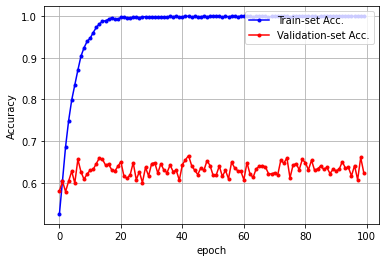

In [19]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

#### 모델 저장

In [20]:
model.save('models/model_ver3.h5')

### 모델 테스트

In [23]:
angles = [0.1, 0.4, 0.4]

In [24]:
pred = model.predict([angles])
print(pred)

[[1.0000000e+00 3.0691776e-09]]


In [25]:
pred[0][0]

1.0